##Importing Data

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"azizbchir77","key":"d6b28e1a1c2e55d95f1072ef9bd91434"}'}

In [2]:
# Create Kaggle folder and move kaggle.json there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install kaggle CLI
!pip install -q kaggle

# Download the dataset
!kaggle datasets download -d alimekni/tunisia-precipitation-2014-2022

# Unzip the dataset
!unzip tunisia-precipitation-2014-2022.zip


Dataset URL: https://www.kaggle.com/datasets/alimekni/tunisia-precipitation-2014-2022
License(s): ODC Public Domain Dedication and Licence (PDDL)
Archive:  tunisia-precipitation-2014-2022.zip
  inflating: Tunisia Precipitation/Stations_List1/01-01-2016.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-01-2018.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-01-2019.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-01-2020.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-01-2021.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-01-2022.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-02-2016.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-02-2017.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-02-2018.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-02-2019.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-02-2020.csv  
  inflating: Tunisia Precipitation/Stations_List1/01-02-2021.csv  
  in

In [3]:
import os
import pandas as pd
from glob import glob
from datetime import datetime

# Define folders
folder1 = "/content/Tunisia Precipitation/Stations_List1"
folder2 = "/content/Tunisia Precipitation/Stations_List2"

# List all CSV files
csv_files = glob(os.path.join(folder1, "*.csv")) + glob(os.path.join(folder2, "*.csv"))

# Read and merge all CSVs
merged_data = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file, dtype=str)  # Read as string to avoid parsing issues
    filename = os.path.basename(file).replace(".csv", "")

    try:
        date = datetime.strptime(filename, "%d-%m-%Y")  # Convert to datetime
    except ValueError:
        print(f"Skipping file with invalid date format: {file}")
        continue

    df["Source_File"] = filename
    df["Date"] = date
    merged_data = pd.concat([merged_data, df], ignore_index=True)

# Optional: Save the merged CSV
merged_data.to_csv("rainfall2014-2022.csv", index=False)


In [3]:
import pandas as pd

df = pd.read_csv("rainfall2014-2022.csv")
df.head()


,Percentage %,Yearly Average,Seasonal Comparison Percentage %,Seasonal Comparison Monthly Difference,Last year rainy period,Last year monthly Rain fall,Percentage current year,Accumulated Daily Averages current year,Daily Accumulated current year,Percentage monthly rain current year,Average monthly rain,Accumulated monthly rain current year,Rainfall today,Station,Source_File,Date
0,38%,462.0,218%,"71,0","80,8","38,4",228%,"77,3","176,5",252%,"43,4","109,4","0,0",جندوبة*,01-11-2018,2018-11-01
1,26%,431.0,121%,"61,1","93,8","31,0",151%,"75,0","113,6",220%,"41,8","92,1","0,0",بوسالم,01-11-2018,2018-11-01
2,26%,448.0,182%,"56,3","64,0","36,5",166%,"70,1","116,3",234%,"39,7","92,8","0,0",غار الدماء,01-11-2018,2018-11-01
3,20%,1578.0,214%,"140,0","144,0","50,0",138%,"223,8","308,0",129%,"146,9","190,0","0,0",عٌن دراهم*,01-11-2018,2018-11-01
4,40%,950.0,189%,"243,6","203,3","55,1",235%,"163,8","384,7",280%,"106,5","298,7","0,0",طبرلة,01-11-2018,2018-11-01


In [4]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286726 entries, 0 to 286725
Data columns (total 16 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Percentage %                             286726 non-null  object 
 1   Yearly Average                           286726 non-null  float64
 2   Seasonal Comparison Percentage %         286726 non-null  object 
 3   Seasonal Comparison Monthly Difference   286726 non-null  object 
 4   Last year rainy period                   286726 non-null  object 
 5   Last year monthly Rain fall              286726 non-null  object 
 6   Percentage current year                  286726 non-null  object 
 7   Accumulated Daily Averages current year  286726 non-null  object 
 8   Daily Accumulated current year           286726 non-null  object 
 9   Percentage monthly rain current year     286726 non-null  object 
 10  Average monthly rain            

,0
Percentage %,0
Yearly Average,0
Seasonal Comparison Percentage %,0
Seasonal Comparison Monthly Difference,0
Last year rainy period,0
Last year monthly Rain fall,0
Percentage current year,0
Accumulated Daily Averages current year,0
Daily Accumulated current year,0
Percentage monthly rain current year,0


In [5]:
df.columns


Index(['Percentage %', 'Yearly Average', 'Seasonal Comparison Percentage %',
       'Seasonal Comparison Monthly Difference', 'Last year rainy period',
       'Last year monthly Rain fall', 'Percentage current year',
       'Accumulated Daily Averages current year',
       'Daily Accumulated current year',
       'Percentage monthly rain current year', 'Average monthly rain',
       'Accumulated monthly rain current year', 'Rainfall today', 'Station',
       'Source_File', 'Date'],
      dtype='object')

In [6]:
# List of columns to convert
numeric_cols = [
    "Rainfall today",
    "Accumulated monthly rain current year",
    "Average monthly rain",
    "Percentage monthly rain current year",
    "Accumulated Daily Averages current year",
    "Daily Accumulated current year",
    "Last year monthly Rain fall",
    "Seasonal Comparison Monthly Difference"
]

# Replace commas with dots and convert to float
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].str.replace(",", ".", regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [7]:
df.head()

,Percentage %,Yearly Average,Seasonal Comparison Percentage %,Seasonal Comparison Monthly Difference,Last year rainy period,Last year monthly Rain fall,Percentage current year,Accumulated Daily Averages current year,Daily Accumulated current year,Percentage monthly rain current year,Average monthly rain,Accumulated monthly rain current year,Rainfall today,Station,Source_File,Date
0,38%,462.0,218%,71.0,"80,8",38.4,228%,77.3,176.5,NaN,43.4,109.4,0.0,جندوبة*,01-11-2018,2018-11-01
1,26%,431.0,121%,61.1,"93,8",31.0,151%,75.0,113.6,NaN,41.8,92.1,0.0,بوسالم,01-11-2018,2018-11-01
2,26%,448.0,182%,56.3,"64,0",36.5,166%,70.1,116.3,NaN,39.7,92.8,0.0,غار الدماء,01-11-2018,2018-11-01
3,20%,1578.0,214%,140.0,"144,0",50.0,138%,223.8,308.0,NaN,146.9,190.0,0.0,عٌن دراهم*,01-11-2018,2018-11-01
4,40%,950.0,189%,243.6,"203,3",55.1,235%,163.8,384.7,NaN,106.5,298.7,0.0,طبرلة,01-11-2018,2018-11-01


In [8]:
df_cleaned = df[["Date", "Station", "Rainfall today"]].copy()


In [9]:
# Ensure 'Date' is datetime and 'Rainfall today' is numeric
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])
df_cleaned["Rainfall today"] = pd.to_numeric(df_cleaned["Rainfall today"], errors='coerce')

# Calculate mean rainfall for Jelma in June
mean_jelma = df_cleaned[
    (df_cleaned["Station"] == "جلمة") &
    (df_cleaned["Date"].dt.month == 6)
]["Rainfall today"].mean(skipna=True)


In [10]:
df_cleaned.loc[
    (df_cleaned["Station"] == "جلمة") &
    (df_cleaned["Date"] == pd.to_datetime("2016-06-28")),
    "Rainfall today"
] = mean_jelma


In [11]:
arabic_to_french = {
    "تونس": "Tunis",
    "أريانة": "Ariana",
    "بن عروس": "Ben Arous",
    "منوبة": "Manouba",
    "نابل": "Nabeul",
    "زغوان": "Zaghouan",
    "باجة": "Beja",
    "جندوبة": "Jendouba",
    "الكاف": "Le Kef",
    "سليانة": "Siliana",
    "القيروان": "Kairouan",
    "القصرين": "Kasserine",
    "سيدي بوزيد": "Sidi Bouzid",
    "سوسة": "Sousse",
    "المنستير": "Monastir",
    "المهدية": "Mahdia",
    "صفاقس": "Sfax",
    "قابس": "Gabes",
    "مدنين": "Medenine",
    "تطاوين": "Tataouine",
    "قبلي": "Kebili",
    "توزر": "Tozeur",
    "قفصة": "Gafsa",
    "بنزرت": "Bizerte"
}


In [12]:
# Filter rows where Station is one of the Arabic governorates and translate Station names
df_cleaned = df_cleaned[df_cleaned["Station"].isin(arabic_to_french.keys())]

# Map Arabic station names to French using the dictionary
df_cleaned["Station"] = df_cleaned["Station"].map(arabic_to_french)


<ipython-input-12-d8036393b422>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Station"] = df_cleaned["Station"].map(arabic_to_french)


In [13]:
df_cleaned

,Date,Station,Rainfall today
34,2018-11-01,Manouba,0.0
49,2018-11-01,Zaghouan,0.0
114,2017-05-08,Manouba,0.0
129,2017-05-08,Zaghouan,0.0
181,2015-08-30,Siliana,0.0
...,...,...,...
286662,2015-06-27,Sidi Bouzid,0.0
286670,2015-06-27,Sousse,0.0
286676,2015-06-27,Monastir,0.0
286681,2015-06-27,Mahdia,0.0


In [14]:
import pandas as pd

# Ensure 'Date' is a datetime type and 'Rainfall today' is numeric
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])
df_cleaned["Rainfall today"] = pd.to_numeric(df_cleaned["Rainfall today"], errors='coerce')

# Sort the data by 'Station' and 'Date'
df_cleaned = df_cleaned.sort_values(by=["Station", "Date"])

# Group by 'Station' and create a list of time series for each station
rain_ts_list = {
    station: pd.Series(data=group["Rainfall today"].values, index=group["Date"])
    for station, group in df_cleaned.groupby("Station")
}


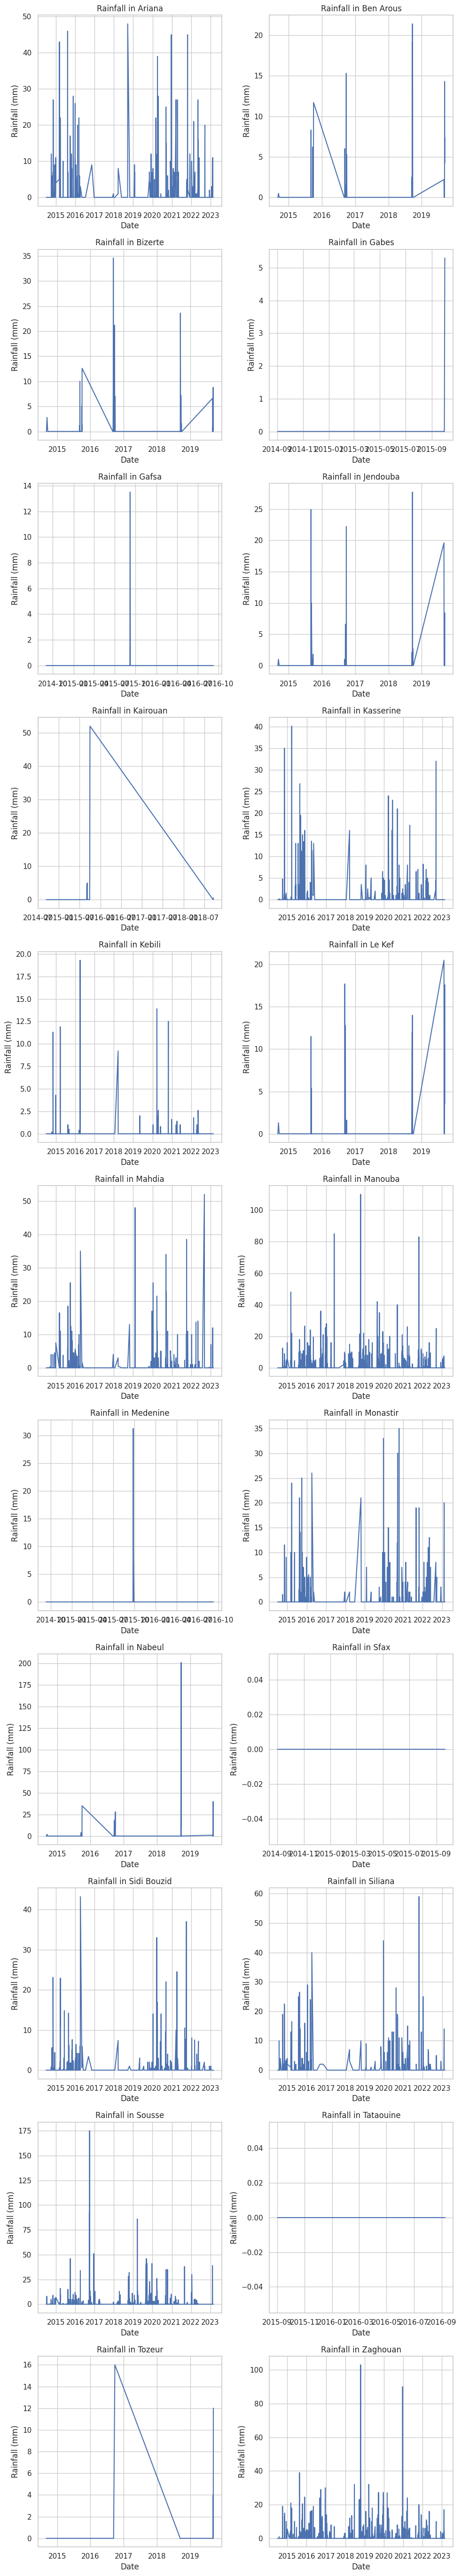

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the required number of rows and columns for the subplots
num_plots = len(rain_ts_list)
ncols = 2  # You can adjust this if you prefer more columns
nrows = np.ceil(num_plots / ncols).astype(int)  # Calculate the number of rows

# Set up the grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(10, nrows * 5))
axes = axes.flatten()  # Flatten axes to easily loop through

# Loop over each station and plot the data
for i, (station, rain_ts) in enumerate(rain_ts_list.items()):
    axes[i].plot(rain_ts.index, rain_ts.values)
    axes[i].set_title(f"Rainfall in {station}")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Rainfall (mm)")

# Hide unused subplots if there are any extra
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


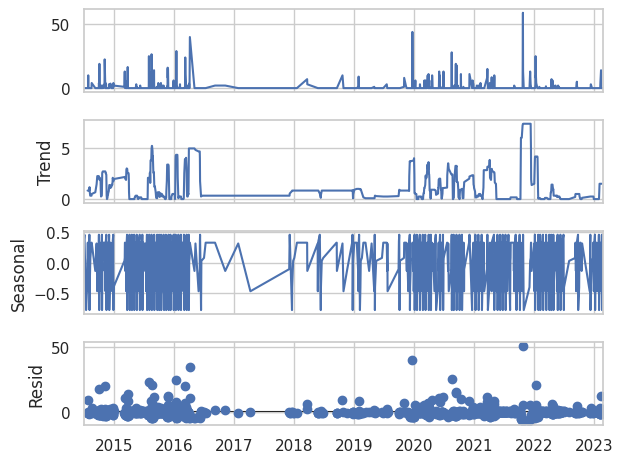

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Get the time series for "Siliana"
rain_siliana = rain_ts_list["Siliana"]

# Perform seasonal decomposition (assuming monthly frequency, adjust as necessary)
decomp_siliana = seasonal_decompose(rain_siliana, model='additive', period=12)  # period=12 for monthly data

# Plot the decomposition components
decomp_siliana.plot()
plt.show()


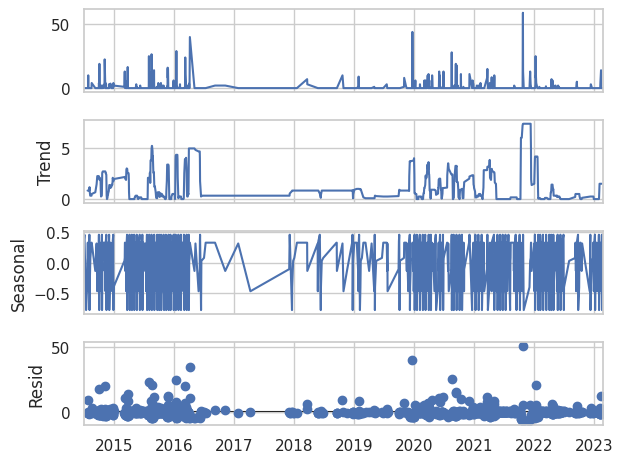

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Get the time series for "Siliana"
rain_monastir = rain_ts_list["Monastir"]

# Perform seasonal decomposition (assuming monthly frequency, adjust as necessary)
decomp_monastir = seasonal_decompose(rain_siliana, model='additive', period=12)  # period=12 for monthly data

# Plot the decomposition components
decomp_monastir.plot()
plt.show()


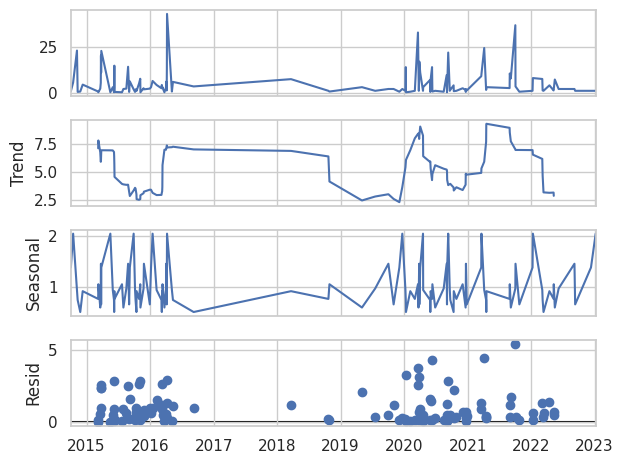

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Get the time series for "Sidi Bouzid"
rain_sidi_bouzid = rain_ts_list["Sidi Bouzid"]

# Remove non-positive values (required for multiplicative decomposition)
rain_sidi_bouzid = rain_sidi_bouzid[rain_sidi_bouzid > 0]

# Ensure the series is regular monthly (period=12)
decomp_sidi_bouzid = seasonal_decompose(rain_sidi_bouzid, model='multiplicative', period=12)

# Plot the decomposition
decomp_sidi_bouzid.plot()
plt.show()


In [30]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.23.5  # Known stable version for compatibility
!pip install pmdarima --no-cache-dir


Found existing installation: numpy 2.2.5
Uninstalling numpy-2.2.5:
  Successfully uninstalled numpy-2.2.5
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.0 MB/s eta 0:00:00



📡 Forecasting for: Ariana


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

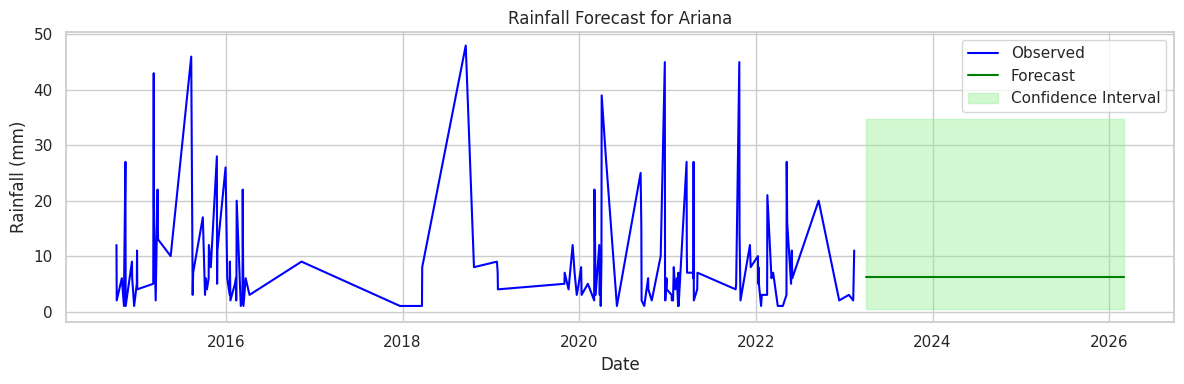


📡 Forecasting for: Ben Arous
⚠️ Not enough data for Ben Arous. Skipping...

📡 Forecasting for: Bizerte
⚠️ Not enough data for Bizerte. Skipping...

📡 Forecasting for: Gabes
⚠️ Not enough data for Gabes. Skipping...

📡 Forecasting for: Gafsa
⚠️ Not enough data for Gafsa. Skipping...

📡 Forecasting for: Jendouba
⚠️ Not enough data for Jendouba. Skipping...

📡 Forecasting for: Kairouan
⚠️ Not enough data for Kairouan. Skipping...

📡 Forecasting for: Kasserine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

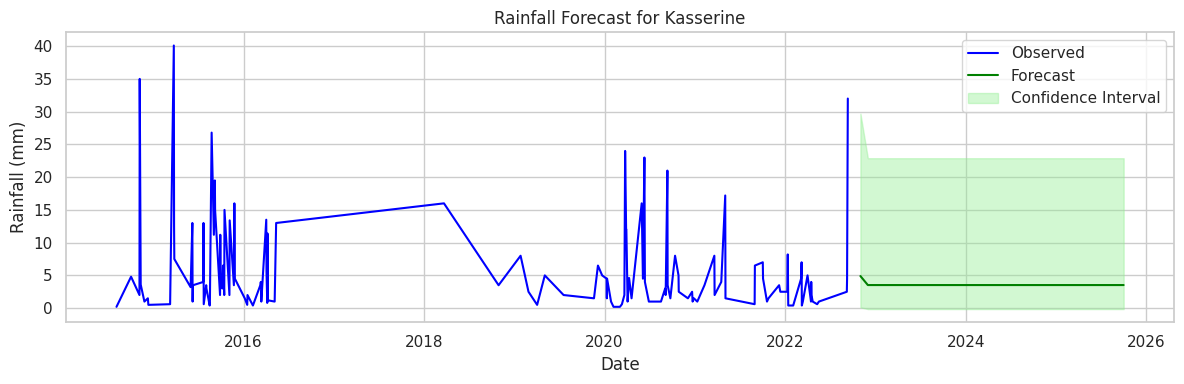


📡 Forecasting for: Kebili


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

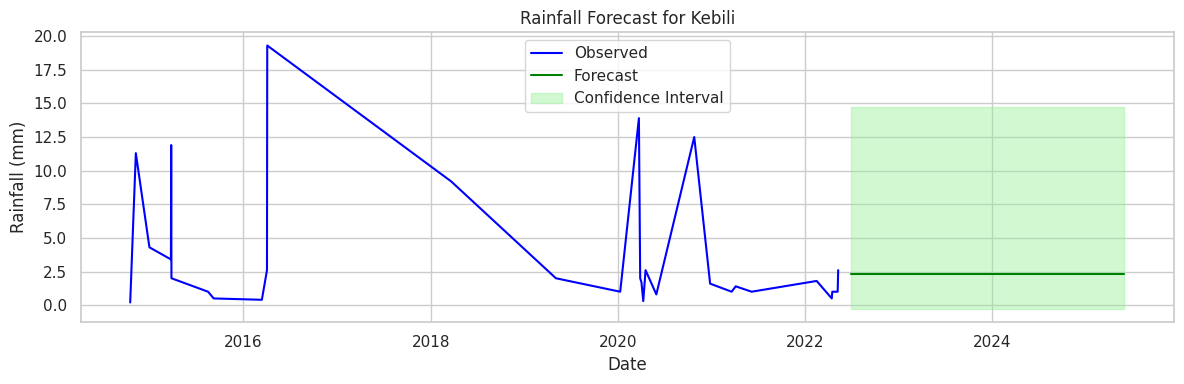


📡 Forecasting for: Le Kef
⚠️ Not enough data for Le Kef. Skipping...

📡 Forecasting for: Mahdia


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

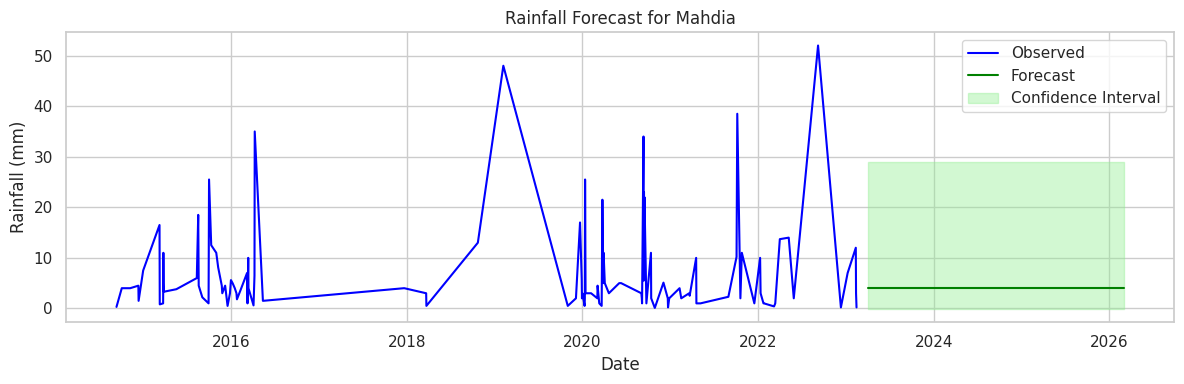


📡 Forecasting for: Manouba


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

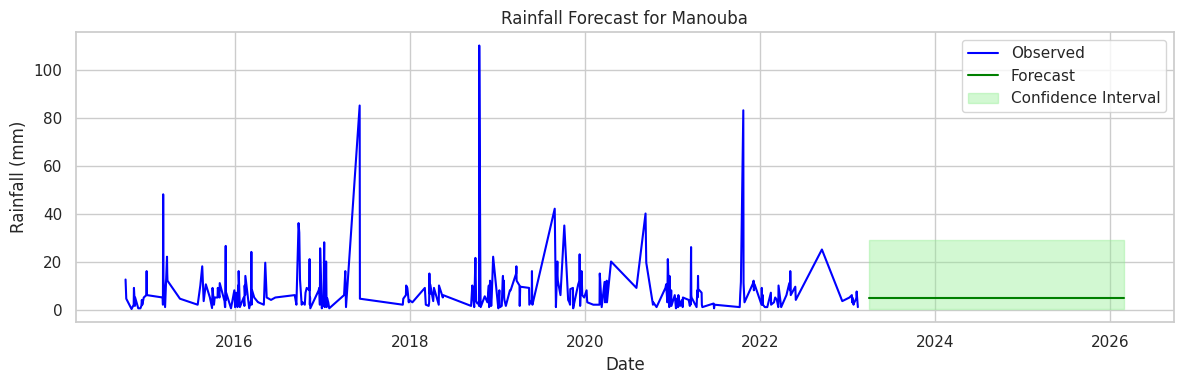


📡 Forecasting for: Medenine
⚠️ Not enough data for Medenine. Skipping...

📡 Forecasting for: Monastir


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

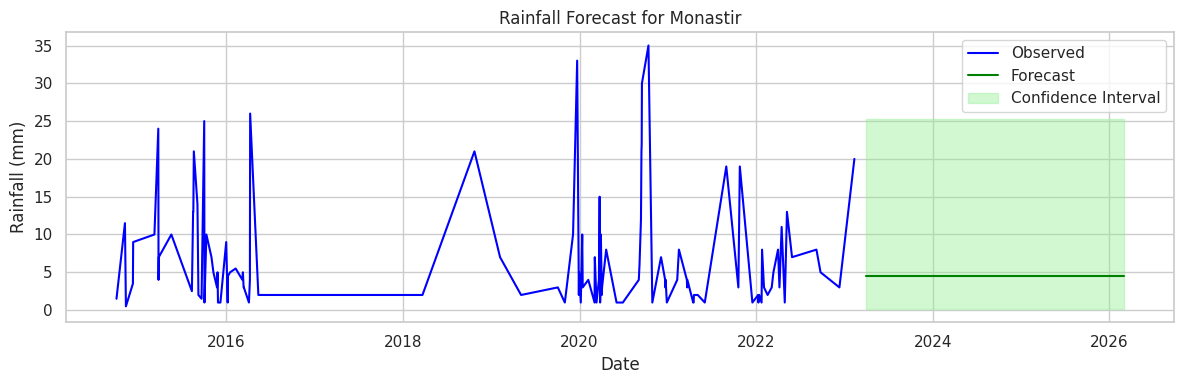


📡 Forecasting for: Nabeul
⚠️ Not enough data for Nabeul. Skipping...

📡 Forecasting for: Sfax
⚠️ Not enough data for Sfax. Skipping...

📡 Forecasting for: Sidi Bouzid


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

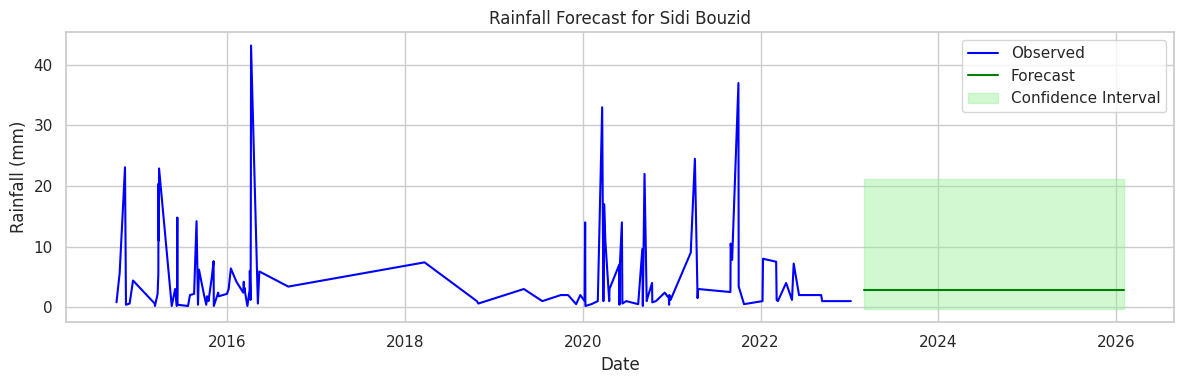


📡 Forecasting for: Siliana


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

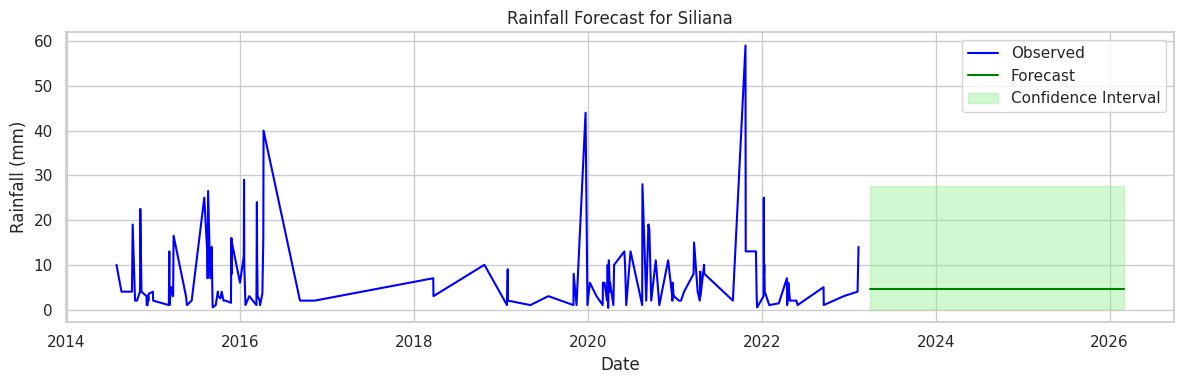


📡 Forecasting for: Sousse


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

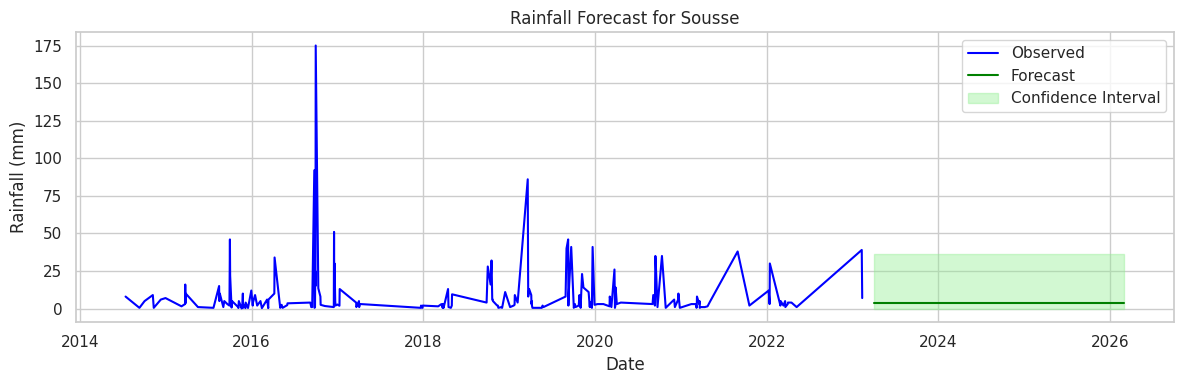


📡 Forecasting for: Tataouine
⚠️ Not enough data for Tataouine. Skipping...

📡 Forecasting for: Tozeur
⚠️ Not enough data for Tozeur. Skipping...

📡 Forecasting for: Zaghouan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

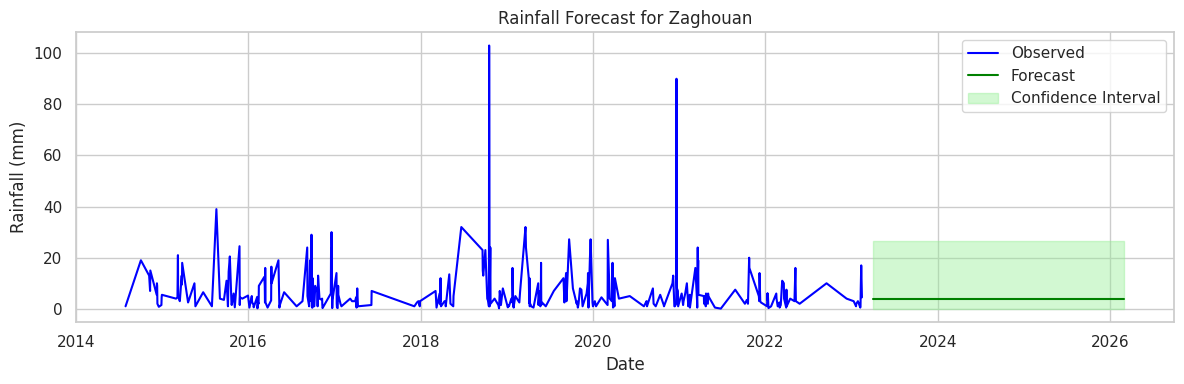

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm

sns.set(style="whitegrid")

# Number of months to forecast
n_periods = 36

# Store results for each station
forecast_results = {}

for station, series in rain_ts_list.items():
    print(f"\n📡 Forecasting for: {station}")

    # Remove non-positive and NaN values
    clean_series = series[series > 0].dropna()

    # Skip stations with insufficient data
    if len(clean_series) < 24:
        print(f"⚠️ Not enough data for {station}. Skipping...")
        continue

    # Log-transform to stabilize variance
    log_series = np.log1p(clean_series)

    try:
        # Fit seasonal ARIMA (monthly frequency = 12)
        model = pm.auto_arima(
            log_series,
            seasonal=True,
            m=12,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True,
            trace=False
        )

        # Forecast
        forecast_log, conf_int_log = model.predict(n_periods=n_periods, return_conf_int=True)

        # Reverse the log1p transform
        forecast = np.expm1(forecast_log)
        conf_int = np.expm1(conf_int_log)

        # Future date index
        last_date = clean_series.index[-1]
        future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

        # Save results
        forecast_df = pd.DataFrame({
            'Date': future_dates,
            'Forecast': forecast,
            'Lower CI': conf_int[:, 0],
            'Upper CI': conf_int[:, 1]
        })

        forecast_results[station] = forecast_df

        # 📊 Plot the forecast vs history
        plt.figure(figsize=(12, 4))
        plt.plot(clean_series, label='Observed', color='blue')
        plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', color='green')
        plt.fill_between(forecast_df['Date'], forecast_df['Lower CI'], forecast_df['Upper CI'],
                         color='lightgreen', alpha=0.4, label='Confidence Interval')
        plt.title(f"Rainfall Forecast for {station}")
        plt.xlabel("Date")
        plt.ylabel("Rainfall (mm)")
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Failed for {station}: {e}")


In [20]:
# List of your target stations
selected_stations = ["Monastir", "Sidi Bouzid", "Kasserine", "Kebili", "Sousse"]

# Combine only selected forecasts
combined_selected_df = pd.concat(
    [forecast_results[station].assign(Station=station) for station in selected_stations if station in forecast_results],
    ignore_index=True
)

# Save to CSV
combined_selected_df.to_csv("forecast_2023_2025_selected_stations.csv", index=False)


In [21]:
from google.colab import files
files.download("forecast_2023_2025_selected_stations.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


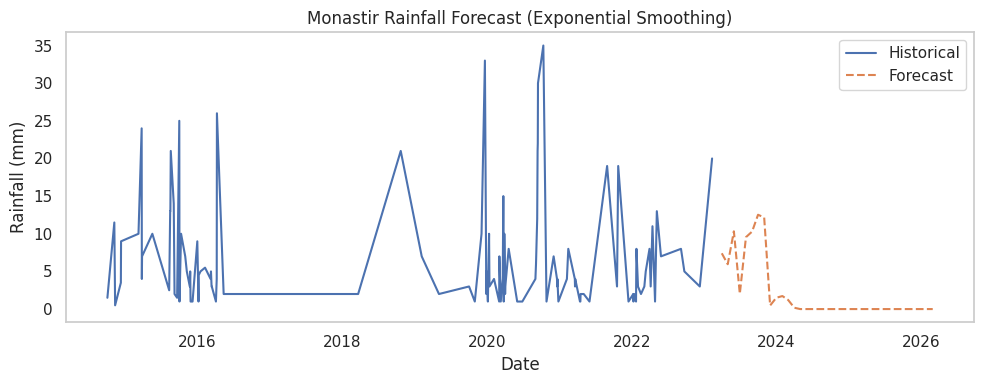

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Clean Monastir series (remove non-positive values)
monastir_series = rain_ts_list["Monastir"]
monastir_series = monastir_series[monastir_series > 0]

# Step 2: Fit Seasonal Exponential Smoothing model
model = ExponentialSmoothing(monastir_series,
                             seasonal='multiplicative',
                             trend='add',
                             seasonal_periods=12).fit()

# Step 3: Forecast next 36 months
forecast = model.forecast(36)

# 👉 Step 4: Remove negative values from forecast
forecast[forecast < 0] = 0

# Step 5: Prepare DataFrame
future_dates = pd.date_range(start=monastir_series.index[-1] + pd.DateOffset(months=1), periods=36, freq='MS')
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast.values,
    'Station': 'Monastir'
})

# Step 6: Plot
plt.figure(figsize=(10, 4))
plt.plot(monastir_series.index, monastir_series, label='Historical')
plt.plot(future_dates, forecast, label='Forecast', linestyle='--')
plt.title("Monastir Rainfall Forecast (Exponential Smoothing)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


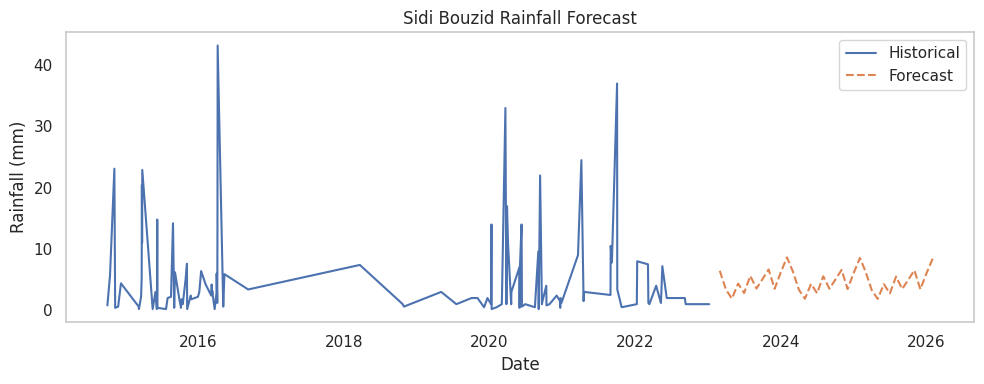

In [23]:
sidi_bouzid_series = rain_ts_list["Sidi Bouzid"]
sidi_bouzid_series = sidi_bouzid_series[sidi_bouzid_series > 0]

model_sb = ExponentialSmoothing(sidi_bouzid_series,
                                 seasonal='multiplicative',
                                 trend='add',
                                 seasonal_periods=12).fit()

forecast_sb = model_sb.forecast(36)
forecast_sb[forecast_sb < 0] = 0

future_dates_sb = pd.date_range(start=sidi_bouzid_series.index[-1] + pd.DateOffset(months=1), periods=36, freq='MS')
forecast_df_sb = pd.DataFrame({
    'Date': future_dates_sb,
    'Forecast': forecast_sb.values,
    'Station': 'Sidi Bouzid'
})

plt.figure(figsize=(10, 4))
plt.plot(sidi_bouzid_series.index, sidi_bouzid_series, label='Historical')
plt.plot(future_dates_sb, forecast_sb, label='Forecast', linestyle='--')
plt.title("Sidi Bouzid Rainfall Forecast")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


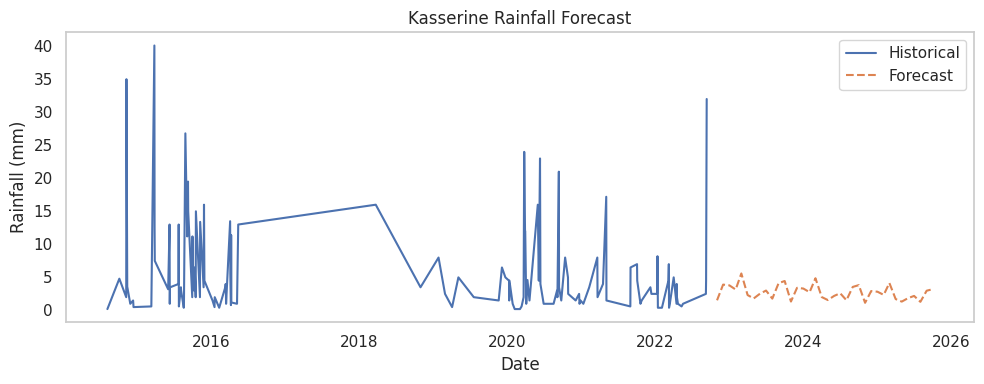

In [24]:
kasserine_series = rain_ts_list["Kasserine"]
kasserine_series = kasserine_series[kasserine_series > 0]

model_ks = ExponentialSmoothing(kasserine_series,
                                 seasonal='multiplicative',
                                 trend='add',
                                 seasonal_periods=12).fit()

forecast_ks = model_ks.forecast(36)
forecast_ks[forecast_ks < 0] = 0

future_dates_ks = pd.date_range(start=kasserine_series.index[-1] + pd.DateOffset(months=1), periods=36, freq='MS')
forecast_df_ks = pd.DataFrame({
    'Date': future_dates_ks,
    'Forecast': forecast_ks.values,
    'Station': 'Kasserine'
})

plt.figure(figsize=(10, 4))
plt.plot(kasserine_series.index, kasserine_series, label='Historical')
plt.plot(future_dates_ks, forecast_ks, label='Forecast', linestyle='--')
plt.title("Kasserine Rainfall Forecast")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


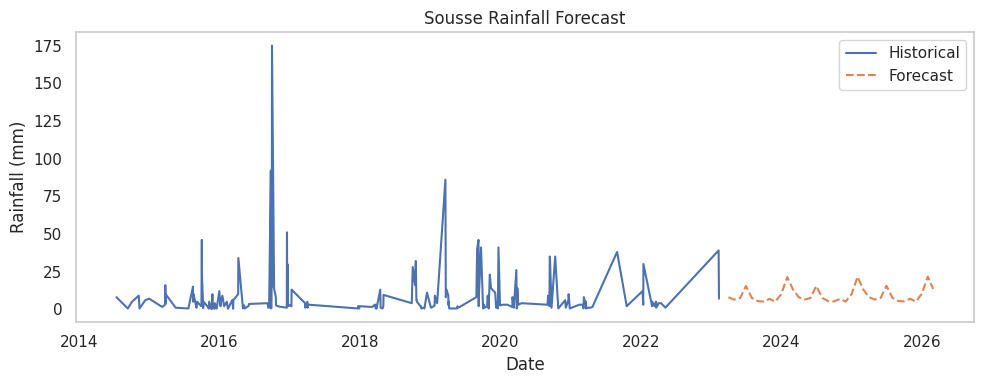

In [25]:
sousse_series = rain_ts_list["Sousse"]
sousse_series = sousse_series[sousse_series > 0]

model_ss = ExponentialSmoothing(sousse_series,
                                 seasonal='multiplicative',
                                 trend='add',
                                 seasonal_periods=12).fit()

forecast_ss = model_ss.forecast(36)
forecast_ss[forecast_ss < 0] = 0

future_dates_ss = pd.date_range(start=sousse_series.index[-1] + pd.DateOffset(months=1), periods=36, freq='MS')
forecast_df_ss = pd.DataFrame({
    'Date': future_dates_ss,
    'Forecast': forecast_ss.values,
    'Station': 'Sousse'
})

plt.figure(figsize=(10, 4))
plt.plot(sousse_series.index, sousse_series, label='Historical')
plt.plot(future_dates_ss, forecast_ss, label='Forecast', linestyle='--')
plt.title("Sousse Rainfall Forecast")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [28]:
# Combine all forecasts into one DataFrame
all_forecasts = pd.concat([forecast_df , forecast_df_sb, forecast_df_ks, forecast_df_ss], ignore_index=True)

# Save to CSV
all_forecasts.to_csv("rainfall_forecast_5_regions.csv", index=False)

# Optional: Display first few rows
all_forecasts.head()


,Date,Forecast,Station
0,2023-04-01,7.408558,Monastir
1,2023-05-01,5.954708,Monastir
2,2023-06-01,10.324206,Monastir
3,2023-07-01,2.020406,Monastir
4,2023-08-01,9.549629,Monastir


In [29]:
from google.colab import files
files.download("rainfall_forecast_5_regions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import joblib
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define your stations
stations = ["Monastir", "Sidi Bouzid", "Kasserine", "Kebili", "Sousse"]

# Fit and save models
for station in stations:
    try:
        # Clean the series
        series = rain_ts_list[station]
        series = series[series > 0]

        # Fit model
        model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()

        # Save model
        model_filename = f"model_{station.lower().replace(' ', '_')}.pkl"
        joblib.dump(model, model_filename)

        print(f"Saved model for {station} to {model_filename}")

    except Exception as e:
        print(f"Error processing {station}: {e}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Saved model for Monastir to model_monastir.pkl
Saved model for Sidi Bouzid to model_sidi_bouzid.pkl
Saved model for Kasserine to model_kasserine.pkl
Saved model for Kebili to model_kebili.pkl
Saved model for Sousse to model_sousse.pkl


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
